# 주제: 나랑 닮은 연예인을 찾아보자

## 데이터
내 사진 8장(주의: 상기 이미지는 실물과 다를 수 있습니다), 연예인 사진 297장, 어벤져스 13장, 해리포터 16장

## 목표
1. 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트 정렬
2. 다양한 탐색을 통해 내 사진과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아내기
3. matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현

## (1) 라이브러리 및 데이터 불러오기

In [301]:
import face_recognition
import numpy as np
import PIL
import os
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

print(face_recognition.__version__)
print(np.__version__)
print(PIL.__version__)

1.2.3
1.22.2
8.3.2


In [302]:
celebrity_picture_path = os.getenv("HOME") + "/aiffel/celebrity_lookalike/celebrity_picture"

def count_files_in_directory(directory):
    count = 0
    for _, _, files in os.walk(directory):
        count += len(files)
    return count

file_count = count_files_in_directory(celebrity_picture_path)
print("파일 개수:", file_count)
#연예인 사진 297장 + 내 사진 2장

파일 개수: 299


In [303]:
my_picture_path = os.getenv('HOME')+'/aiffel/celebrity_lookalike/my_picture'
file_count = count_files_in_directory(my_picture_path)
print("파일 개수:", file_count)
#내 사진 8장

파일 개수: 8


In [304]:
Avengers_path = os.getenv('HOME')+'/aiffel/celebrity_lookalike/Avengers'
file_count = count_files_in_directory(Avengers_path)
print("파일 개수:", file_count)
#어벤져스 사진 13장 + 내 사진 2장

파일 개수: 15


In [305]:
HarryPotter_path = os.getenv('HOME')+'/aiffel/celebrity_lookalike/HarryPotter'
file_count = count_files_in_directory(HarryPotter_path)
print("파일 개수:", file_count)
#해리포터 사진 16장 + 내 사진 2장

파일 개수: 18


## (2) 얼굴 영역 자르기

In [306]:
def get_cropped_face(image_path):
    # [[YOUR CODE]]
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

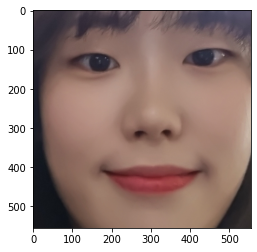

In [307]:
image_path = os.getenv('HOME')+'/aiffel/celebrity_lookalike/my_picture/img03.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

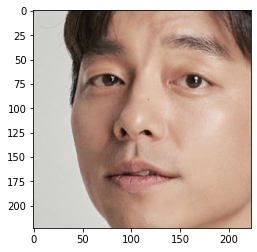

In [308]:
image_path = os.getenv('HOME')+'/aiffel/celebrity_lookalike/celebrity_picture/공유.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## (3) 얼굴 영역 임베딩 추출하기

In [309]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [310]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        if os.path.isdir(img_path):  # 만약 디렉토리인 경우, 무시하고 다음 파일로 넘어감
            continue
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [311]:
my_picture_embedding_dict = get_face_embedding_dict(my_picture_path)
my_picture_embedding_dict['img03']

array([-6.27523735e-02,  7.81522840e-02,  4.24649417e-02, -8.85888562e-02,
       -1.19298048e-01, -7.82214105e-03, -7.03725517e-02, -6.92857280e-02,
        1.52009666e-01, -1.29517674e-01,  1.91215590e-01, -7.21793398e-02,
       -2.57165849e-01, -4.37818021e-02, -1.03453346e-01,  2.52420455e-01,
       -1.46270901e-01, -1.62632376e-01, -4.36947793e-02,  1.41014364e-02,
        1.10318787e-01,  2.78104413e-02,  1.68354567e-02,  6.89424351e-02,
       -1.00015193e-01, -2.88062245e-01, -1.15469262e-01, -1.35304518e-02,
       -4.79521714e-02, -1.18028961e-01, -3.04763131e-02,  7.82705098e-02,
       -1.58255816e-01,  3.17975134e-03,  1.59374513e-02,  9.68458876e-02,
       -4.56990376e-02, -1.21594407e-01,  1.50583923e-01,  1.51613560e-02,
       -2.78086483e-01,  5.45431264e-02,  5.46445251e-02,  2.51174271e-01,
        1.97100356e-01, -3.42224091e-02,  1.11080222e-02, -1.70631573e-01,
        7.56551176e-02, -1.90509707e-01, -1.17337536e-02,  1.69174165e-01,
        3.25039476e-02,  

In [312]:
celebrity_embedding_dict = get_face_embedding_dict(celebrity_picture_path)
celebrity_embedding_dict['태연']

array([-0.05832611,  0.08650121,  0.09609314, -0.08645427, -0.04536815,
        0.00911583, -0.09041593, -0.083923  ,  0.13654682, -0.16282591,
        0.23101933, -0.06544134, -0.22658628, -0.0451633 , -0.05203072,
        0.19644116, -0.17820568, -0.14273839, -0.03521199,  0.02405678,
        0.10089701,  0.07277459, -0.01784261,  0.01457554, -0.12162289,
       -0.30795228, -0.09869153, -0.027395  , -0.04413068, -0.10291066,
       -0.05202296,  0.06361919, -0.18417709,  0.02716298, -0.00758901,
        0.12781557,  0.00935094, -0.08867297,  0.14594853,  0.01699896,
       -0.28937352,  0.10548922,  0.02909858,  0.23222357,  0.16457024,
       -0.03816761, -0.01715928, -0.1753045 ,  0.08326229, -0.13974187,
        0.03850684,  0.16461825,  0.06933422,  0.06771764,  0.00946827,
       -0.11631443,  0.03686657,  0.08126064, -0.12411997, -0.03522221,
        0.09706895, -0.08108591,  0.03647789, -0.10451367,  0.11921875,
        0.05328177, -0.08073267, -0.23669644,  0.09432068, -0.15

## (4) 내 사진끼리 비교하기

In [313]:
def get_distance(name1, name2):
    return np.linalg.norm(my_picture_embedding_dict[name1]-my_picture_embedding_dict[name2], ord=2)

get_distance('img01', 'img02')

0.32396804225658044

In [314]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [316]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(my_picture_embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [317]:
get_nearest_face('img01', 7)

순위 1 : 이름(img03), 거리(0.2881872361309339)
순위 2 : 이름(img08), 거리(0.2888692459274187)
순위 3 : 이름(img06), 거리(0.2937916241204757)
순위 4 : 이름(img02), 거리(0.32396804225658044)
순위 5 : 이름(img07), 거리(0.37703502526150745)
순위 6 : 이름(img04), 거리(0.4269357668660581)
순위 7 : 이름(img05), 거리(0.44056982839943604)


-> img01과 같은 날, 같은 필터를 사용한 img03이 가장 거리가 가깝게 나왔다. img08과 img06은 img01과 다른 날이지만 같은 필터를 사용하여 비슷한 구도로 찍은 사진이며 img02는 같은 날이지만 다른 필터를 사용한 사진이다. 이를 통해 필터 혹은 구도가 이미지 거리에 영향을 준다는 것을 알 수 있다. 그리고 img04와 img07은 안경을 쓴 사진인데 확실히 안경을 쓴 사진과 안경을 쓰지 않은 사진의 차이가 가장 큰 것 같다. 이러한 결과를 통해 라이브러리face_recognition의 성능에 신뢰가 감을 알 수 있다.

## (5) 내 사진과 모든 연예인의 사진 비교하기

In [318]:
def get_distance(name1, name2):
    return np.linalg.norm(celebrity_embedding_dict[name1]-celebrity_embedding_dict[name2], ord=2)

In [319]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [322]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(celebrity_embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            image_path = os.getenv('HOME')+'/aiffel/celebrity_lookalike/celebrity_picture/{}.jpg'.format(sorted_faces[i][0])
            cropped_face = get_cropped_face(image_path)
            plt.imshow(cropped_face)
            plt.show()

순위 1 : 이름(img05), 거리(0.3256358827680642)


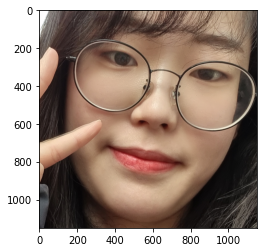

순위 2 : 이름(아이유), 거리(0.33138915875311525)


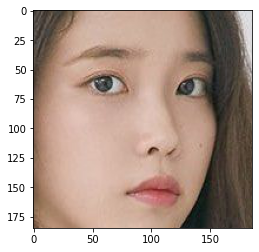

순위 3 : 이름(태연), 거리(0.3509526962017822)


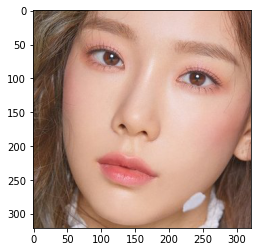

순위 4 : 이름(강미나), 거리(0.3568542032732984)


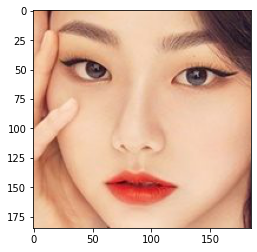

순위 5 : 이름(케이), 거리(0.3625493476898787)


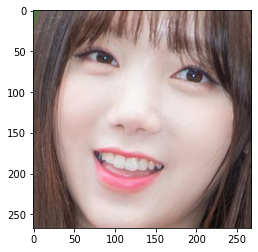

In [324]:
get_nearest_face('img03', 5)

-> 아이유를 굉장히 좋아하는데 닮은 꼴로 나와서 기분이 매우 좋다. 순위에 있는 사람들을 전체적으로 살펴보자면 여자이고 젊은 사람들인 인물들이 거리가 가까운 것으로 나타난 것 같다.

순위 1 : 이름(img03), 거리(0.3256358827680642)


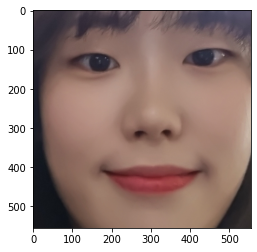

순위 2 : 이름(태연), 거리(0.3402130306067671)


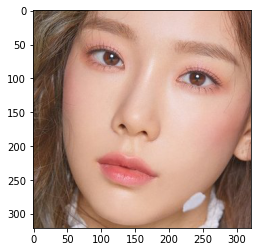

순위 3 : 이름(류준열), 거리(0.38753373721289486)


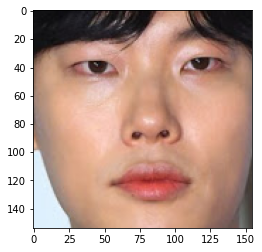

순위 4 : 이름(아이유), 거리(0.3917651689587464)


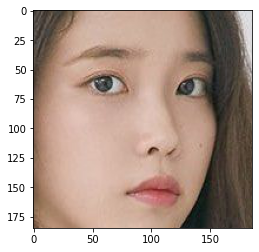

순위 5 : 이름(목진화), 거리(0.40081070107965044)


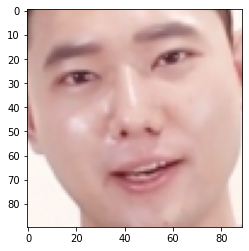

In [326]:
get_nearest_face('img05', 5)

-> 안경쓴 사진과 비교하니 새로운 결과가 나왔다. 남자 연예인도 순위에 들어온다. 어렸을 때 중성적이게 생겼다는 말을 많이 들었는데 아무래도 안경을 썼던 게 그렇게 보이는 이유에 큰 영향을 끼친 것 같다.

## (6) 재밌고 다양한 시각화 시도하기
### 1. 어벤져스 닮은 꼴 찾기

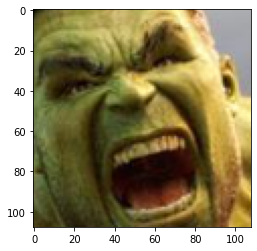

In [327]:
image_path = os.getenv('HOME')+'/aiffel/celebrity_lookalike/Avengers/헐크.PNG'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [328]:
Avengers_path = os.getenv("HOME") + "/aiffel/celebrity_lookalike/Avengers"
Avengers__embedding_dict = get_face_embedding_dict(Avengers_path)

In [329]:
def get_distance(name1, name2):
    return np.linalg.norm(Avengers__embedding_dict[name1]-Avengers__embedding_dict[name2], ord=2)

In [330]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [333]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(Avengers__embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [334]:
get_nearest_face('img03', 5)

순위 1 : 이름(img05), 거리(0.3256358827680642)
순위 2 : 이름(완다), 거리(0.73503352916286)
순위 3 : 이름(블랙위도우), 거리(0.7828974516140966)
순위 4 : 이름(비전), 거리(0.8473339450132432)
순위 5 : 이름(로키), 거리(0.8593836408227862)


In [335]:
get_nearest_face('img05', 5)

순위 1 : 이름(img03), 거리(0.3256358827680642)
순위 2 : 이름(완다), 거리(0.733933126489159)
순위 3 : 이름(블랙위도우), 거리(0.7671378553998849)
순위 4 : 이름(아이언맨), 거리(0.8091129934945777)
순위 5 : 이름(로키), 거리(0.8444512875712145)


-> 전체적으로 거리가 멀지만 그래도 어벤져스 이미지 중에서 여자인 완다와 블랙위도우가 순위 1, 2위를 차이했다. 흥미로운 점은 얼굴 윤곽이 잘 드러나지 않는 비전이 순위 3위를 기록하였는데 타노스나 헐크가 탑5에 들어오지 않아서 다행이다.

### 2. 해리포터 닮은 꼴 찾기

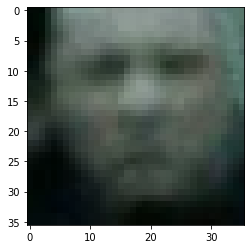

In [336]:
image_path = os.getenv('HOME')+'/aiffel/celebrity_lookalike/HarryPotter/볼드모트.PNG'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

-> 다른 사진은 잘 crop되는데 볼드모트는 crop되는 과정에서 사진 화질이 깨지는 현상을 발견하였다. 사람의 윤곽과 살짝 달라서 코 부분에 좀더 입체를 줄 수 있도록 만들고 이 사진을 사람 얼굴로 인식하여 진행되는 것으로 추정된다.

In [337]:
HarryPotter_path = os.getenv("HOME") + "/aiffel/celebrity_lookalike/HarryPotter"
HarryPotter_embedding_dict = get_face_embedding_dict(HarryPotter_path)

In [338]:
def get_distance(name1, name2):
    return np.linalg.norm(HarryPotter_embedding_dict[name1]-HarryPotter_embedding_dict[name2], ord=2)

In [339]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [340]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(HarryPotter_embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [341]:
get_nearest_face('img03', 5)

순위 1 : 이름(img05), 거리(0.3256358827680642)
순위 2 : 이름(시빌트릴로니), 거리(0.6996985105258222)
순위 3 : 이름(론위즐리), 거리(0.7349953509237293)
순위 4 : 이름(루나러브굿), 거리(0.8012556726025234)
순위 5 : 이름(헤르미온느), 거리(0.813155972721141)


In [342]:
get_nearest_face('img05', 5)

순위 1 : 이름(img03), 거리(0.3256358827680642)
순위 2 : 이름(시빌트릴로니), 거리(0.6895260012129986)
순위 3 : 이름(론위즐리), 거리(0.7196832876048815)
순위 4 : 이름(루나러브굿), 거리(0.7925746409338554)
순위 5 : 이름(해리포터소년기), 거리(0.8014837533865298)


-> 남자배우가 닮은꼴의 상위를 차지한 것이 재미있는 요소인 것 같다. 그래도 해리포터 등장인물 중 젊은 인물들이 상위 순위로 나온 것을 보아 컴퓨터가 나이를 고려한 차이도 알 수 있는 것인가?하는 새로운 호기심이 생겼다.

### 3. 지브리 닮은 꼴 찾기

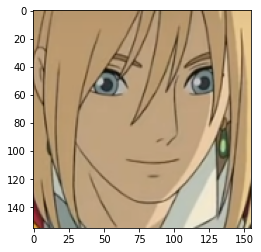

In [343]:
image_path = os.getenv('HOME')+'/aiffel/celebrity_lookalike/Ghibli/움쥑이는성하울.PNG'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

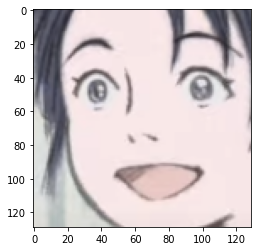

In [344]:
image_path = os.getenv('HOME')+'/aiffel/celebrity_lookalike/Ghibli/카구야공주.PNG'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

-> 지브리 등장인물로도 해보고 싶었으나 그림이어서 그런지 얼굴 인식이 잘 되지 않았다. 모노노케 히메와 라퓨타 시타의 사진을 각각 약 10장씩 다양하게 캡쳐해보아도 잘 안됐다. 17장 중에 2장만 인식이 되어서 2장으로만 진행하려 하였지만 마지막 단계에서 계속 out of range 에러가 떠서 다음에 도전해보아야겠다.

# 프로젝트 회고

## 배운점
1. 에러1: 모든 파일을 임베딩하는 부분에서 out of range 에러가 떴다. 문제가 있었던 get_cropped_face함수 안에 print(image) 코드를 넣어 어디에서 오류가 발생하였는지 원인을 확인하였다. 산들.ipeg가 어떤 이유에서 cropped이 되지 않는 현상을 발견하였다. 정확한 이유는 더 조사해 보아야겠지만 그 파일을 지우고 나니 새로운 에러가 떴다.
2. 에러2: [Errno 21] Is a directory: '/aiffel/aiffel/celebrity_lookalike/celebrity_picture/.ipynb_checkpoints' 에러가 떴다. 이 에러는 파일을 처리하는 과정에서 디렉토리가 발견되어 뜨는 오류다. 만약 디렉토리인 경우, 무시하고 다음 파일로 넘어가는 코드를 추가 작성하니 해결되었다!
3. 사진을 여러 장 띄우는 작업을 어려워했었는데 생각보다 간단해서 놀랐다. 이전에 사용하던 plt.imshow()함수와 plt.show()함수를 사용하면 간편하게 여러 장을 띄울 수 있다.

## 아쉬운점
1. 지브리를 비롯한 디즈니나 여러 장르의 만화 사진으로도 닮은 꼴 찾기를 해보고 싶었는데 인식이 잘 안되어서 아쉽다. 실제 인물을 만화 등장인물로 만들어주는 프로그램은 많지만 만화 등장인물을 제대로 인식하는 라이브러리나 프로그램은 잘 없는 것 같다. 이를 이용하여 만들어보는 것도 도전적일 것 같다.
2. flask나 tkinter같은 웹 프레임워크를 이용하여 사진 파일을 넣으면 바로 비교해주는 프로그램을 만들고 싶었는데 시간이 부족해서 만들지 못했다. 이 두 프레임워크를 이용하는 방법을 공부하고 적용해보고 싶다.

## 종합평가
전체적으로 프로젝트를 진행하는 내내 재미있었다. 사진이 주어지면 파일확장자명이나 사진의 크기에 상관없이 얼굴부분만 잘 추출되고 그 결과를 확인하였을 때 타당성이 있는 것으로 느껴졌다. 라이브러리가 굉장히 잘 만들어졌다는 생각이 들었다. 나도 나중에 실력이 된다면 만화 인물의 얼굴을 추출하는 프로그램을 만들어보고 싶다. 

# Reference
1. face_recognition 소개  
https://hatreasuree.tistory.com/16  
2. face_recognition 라이브러리  
https://face-recognition.readthedocs.io/en/latest/_modules/face_recognition/api.html#face_locations  
3. 파일명 일괄적으로 변경하기  
http://jason-heo.github.io/programming/2014/03/05/linux-rename.html  
4. 점프 투 플라스크  
https://wikidocs.net/81088  
5. tkinter 라이브러리 사용  
https://wikidocs.net/132610  